## Data Exploratory Analysis

## Data Processing

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [7]:
data = pd.read_csv("../data/raw_house_data.csv")
data.head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms bathrooms sqrt_ft garage  \
0        1941        13        10   10500      0   
1        1997         2         2    7300      0   
2        1997         2         3    None   None   
3        1930         7         5    9019      4   
4        1995         4         6    6396      3   

                                    kitchen_features fireplaces  \
0            Dishwasher, Freezer, Refrigerator, Oven          6   
1                       Dishwasher, Garbage Disposal          5   
2         Dishwasher, Garbage Disposal, Refrigerator          5   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...          4   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...          5   

                 floor_covering   HOA  
0            Mexican Tile, Wood     0  
1          Natural Stone, Other     0  
2    Natural Stone, Other: Rock  None  
3  Ceramic Tile, Laminate, Wood  None  
4              Carpet, Concrete    55

In [8]:
data.shape

(5000, 16)

In [9]:
data.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

The table above shows that there are 10 missing values in the lot_acres variable. Moreover, there are 7 categorical variables and 9 numerical ones. Let's investigate further into these variables.

In [11]:
# numerical variables
numVars = data.select_dtypes(include=np.number).columns.tolist()
# categorical var
catVars = [x for x in data.columns if x not in numVars]
catVars

['bathrooms',
 'sqrt_ft',
 'garage',
 'kitchen_features',
 'fireplaces',
 'floor_covering',
 'HOA']

In [12]:
data[catVars].head()

bathrooms sqrt_ft garage                                   kitchen_features  \
0        10   10500      0            Dishwasher, Freezer, Refrigerator, Oven   
1         2    7300      0                       Dishwasher, Garbage Disposal   
2         3    None   None         Dishwasher, Garbage Disposal, Refrigerator   
3         5    9019      4  Dishwasher, Double Sink, Pantry: Butler, Refri...   
4         6    6396      3  Dishwasher, Garbage Disposal, Refrigerator, Mi...   

  fireplaces                floor_covering   HOA  
0          6            Mexican Tile, Wood     0  
1          5          Natural Stone, Other     0  
2          5    Natural Stone, Other: Rock  None  
3          4  Ceramic Tile, Laminate, Wood  None  
4          5              Carpet, Concrete    55

bathrooms, sqrt_ft and garage seem more appropriate as numerical variables. Let's investigate these variables.

In [13]:
# Unique values of garage variable
data["garage"].unique()

array(['0', 'None', '4', '3', '5', '2', '6', '15', '8', '7', '4.5', '3.5',
       '2.5', '1', '9', '22', '30', '12', '10', '11', '20', '13'],
      dtype=object)

In [14]:
# Unique values of bathroom variable
data["bathrooms"].unique()

array(['10', '2', '3', '5', '6', '4', '8', '7', '15', '4.5', '1', '9',
       '11', '18', '14', '3.5', 'None', '35', '2.5', '36'], dtype=object)

In [15]:
# Unique values of fireplaces variable
data["fireplaces"].unique()

array(['6', '5', '4', '1', '2', '3', '7', '0', '9', ' ', '8'],
      dtype=object)

In [16]:
# Unique values of sqrt_ft variable
data["sqrt_ft"].unique()

array(['10500', '7300', 'None', ..., '2106', '3601', '1772'], dtype=object)

The unique values of these variables shows that they should be numerical. Furthermore, there are missing values encoded as "None", "", in these variables. We should also handle these missing values later.

In [17]:
cat_to_num_vars = ["bathrooms", "garage", "fireplaces", "sqrt_ft"]

In [18]:
data[numVars].head()

MLS  sold_price  zipcode   longitude   latitude  lot_acres     taxes  \
0  21530491   5300000.0    85637 -110.378200  31.356362    2154.00   5272.00   
1  21529082   4200000.0    85646 -111.045371  31.594213    1707.00  10422.36   
2   3054672   4200000.0    85646 -111.040707  31.594844    1707.00  10482.00   
3  21919321   4500000.0    85646 -111.035925  31.645878     636.67   8418.58   
4  21306357   3411450.0    85750 -110.813768  32.285162       3.21  15393.00   

   year_built  bedrooms  
0        1941        13  
1        1997         2  
2        1997         2  
3        1930         7  
4        1995         4

In [19]:
data["zipcode"].unique()

array([85637, 85646, 85750, 85718, 85712, 85640, 85658, 85739, 85609,
       85755, 86024, 85749, 85715, 85624, 85745, 85742, 85648, 85716,
       85701, 85719, 85641, 85737, 85705, 85743, 85748, 85611, 85704,
       85747, 85614, 85603, 85645, 85602, 85621, 85610, 85615, 85623,
       85622, 85730, 85619, 85629, 85630, 85710, 85643, 86323, 85118,
       85605, 85929, 85711, 85541, 85713, 85625, 85935, 85601, 85901,
       85638, 85192])

In [20]:
num_to_cat_vars = ["zipcode"]

Although zipcode is encoded numerically, it should be a categorical variables. 

In [21]:
print("Number of unique values of MLS:")
len(data["MLS"].unique())

Number of unique values of MLS:


5000

There are 5000 unique MLS corresponding 5000 observations. It looks like this variable is not very useful as it acts similar to the index. I will drop this variable.

In [22]:
numVars1 = numVars + cat_to_num_vars
numVars1.remove("MLS")
numVars1.remove("zipcode")
catVars1 = [x for x in catVars if x not in cat_to_num_vars]
catVars1 = catVars1 + num_to_cat_vars
catVars1

['kitchen_features', 'floor_covering', 'HOA', 'zipcode']

In [23]:
data1 = data[numVars1+catVars1]
data1.head()

sold_price   longitude   latitude  lot_acres     taxes  year_built  \
0   5300000.0 -110.378200  31.356362    2154.00   5272.00        1941   
1   4200000.0 -111.045371  31.594213    1707.00  10422.36        1997   
2   4200000.0 -111.040707  31.594844    1707.00  10482.00        1997   
3   4500000.0 -111.035925  31.645878     636.67   8418.58        1930   
4   3411450.0 -110.813768  32.285162       3.21  15393.00        1995   

   bedrooms bathrooms garage fireplaces sqrt_ft  \
0        13        10      0          6   10500   
1         2         2      0          5    7300   
2         2         3   None          5    None   
3         7         5      4          4    9019   
4         4         6      3          5    6396   

                                    kitchen_features  \
0            Dishwasher, Freezer, Refrigerator, Oven   
1                       Dishwasher, Garbage Disposal   
2         Dishwasher, Garbage Disposal, Refrigerator   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...   

                 floor_covering   HOA  zipcode  
0            Mexican Tile, Wood     0    85637  
1          Natural Stone, Other     0    85646  
2    Natural Stone, Other: Rock  None    85646  
3  Ceramic Tile, Laminate, Wood  None    85646  
4              Carpet, Concrete    55    85750

In [24]:
# Convert variables from string to float 
for i in cat_to_num_vars:
    data1[i] = pd.to_numeric(data1[i], errors="coerce")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        5000 non-null   float64
 1   longitude         5000 non-null   float64
 2   latitude          5000 non-null   float64
 3   lot_acres         4990 non-null   float64
 4   taxes             5000 non-null   float64
 5   year_built        5000 non-null   int64  
 6   bedrooms          5000 non-null   int64  
 7   bathrooms         4994 non-null   float64
 8   garage            4993 non-null   float64
 9   fireplaces        4975 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  kitchen_features  5000 non-null   object 
 12  floor_covering    5000 non-null   object 
 13  HOA               5000 non-null   object 
 14  zipcode           5000 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 586.1+ KB


## Handling Missing Values

In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        5000 non-null   float64
 1   longitude         5000 non-null   float64
 2   latitude          5000 non-null   float64
 3   lot_acres         4990 non-null   float64
 4   taxes             5000 non-null   float64
 5   year_built        5000 non-null   int64  
 6   bedrooms          5000 non-null   int64  
 7   bathrooms         4994 non-null   float64
 8   garage            4993 non-null   float64
 9   fireplaces        4975 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  kitchen_features  5000 non-null   object 
 12  floor_covering    5000 non-null   object 
 13  HOA               5000 non-null   object 
 14  zipcode           5000 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 586.1+ KB


Since there are not a lot of missing values in our numerical dataset, I'll just drop these observations.

In [26]:

data2 = data1.dropna()
data2.shape

(4940, 15)

In [27]:
# Categorical Variables 
data2[catVars1].head()

kitchen_features  \
0            Dishwasher, Freezer, Refrigerator, Oven   
1                       Dishwasher, Garbage Disposal   
3  Dishwasher, Double Sink, Pantry: Butler, Refri...   
4  Dishwasher, Garbage Disposal, Refrigerator, Mi...   
5  Dishwasher, Garbage Disposal, Refrigerator, Mi...   

                 floor_covering   HOA  zipcode  
0            Mexican Tile, Wood     0    85637  
1          Natural Stone, Other     0    85646  
3  Ceramic Tile, Laminate, Wood  None    85646  
4              Carpet, Concrete    55    85750  
5    Natural Stone, Wood, Other   422    85718

As shown in the table above, there are missing values in these variables encoded as "None". We'll check to see how many missing values are there.

In [28]:
catVarsToCheck = [x for x in catVars1 if x != "zipcode"]
for i in catVarsToCheck:
    if i == "zipcode":
        pass
    count = 0
    for idx, val in enumerate(data2[i].values):
        if val == "None":
            count += 1
    print(f"Variable {i}, total number of missing values:", count)

Variable kitchen_features, total number of missing values: 32
Variable floor_covering, total number of missing values: 0
Variable HOA, total number of missing values: 540


HOA is not necessary in a housing unit. Therefore, although the values are encoded as None, it does not mean it is missing. We'll encode these values as -1. For the kitchen variable, I'll remove the missing values.

In [29]:
data2["HOA"] = pd.to_numeric(data2["HOA"], errors="coerce")
data2["HOA"].fillna(-1, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 0 to 4998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold_price        4940 non-null   float64
 1   longitude         4940 non-null   float64
 2   latitude          4940 non-null   float64
 3   lot_acres         4940 non-null   float64
 4   taxes             4940 non-null   float64
 5   year_built        4940 non-null   int64  
 6   bedrooms          4940 non-null   int64  
 7   bathrooms         4940 non-null   float64
 8   garage            4940 non-null   float64
 9   fireplaces        4940 non-null   float64
 10  sqrt_ft           4940 non-null   float64
 11  kitchen_features  4940 non-null   object 
 12  floor_covering    4940 non-null   object 
 13  HOA               4940 non-null   float64
 14  zipcode           4940 non-null   int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 617.5+ KB


In [30]:
data2.loc[data2["kitchen_features"] != "None"].shape

(4908, 15)

In [31]:
# Save data to csv file
data2.to_csv("cleaned_raw_house_data.csv")

## Data Analysis

### Dealing with outliers

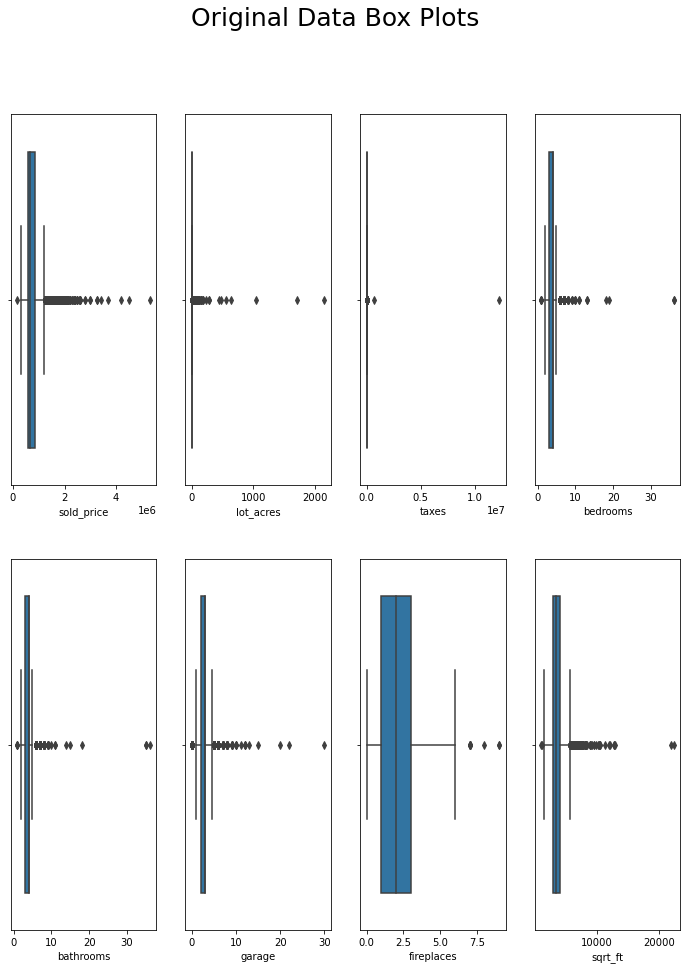

In [32]:
numVarsToPlot = [x for x in numVars1 if x not in ["longitude", "latitude", "year_built"]]
n_rows = 2
n_cols = len(numVarsToPlot) // 2
count = 0

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,15))
for idx, var in enumerate(numVarsToPlot):
    plt.subplot(n_rows, n_cols, count+1)
    sns.boxplot(data2[var], orient="vertical")
    count += 1
fig.suptitle("Original Data Box Plots", fontsize=25)
plt.show()

There are many outliers in our dataset. I will winsorize the data to reduce the effects of the outliers

In [33]:
data3 = data2.copy()
for col in data2[numVarsToPlot].columns:
    data3[col] = sp.stats.mstats.winsorize(data2[col], limits=0.05)


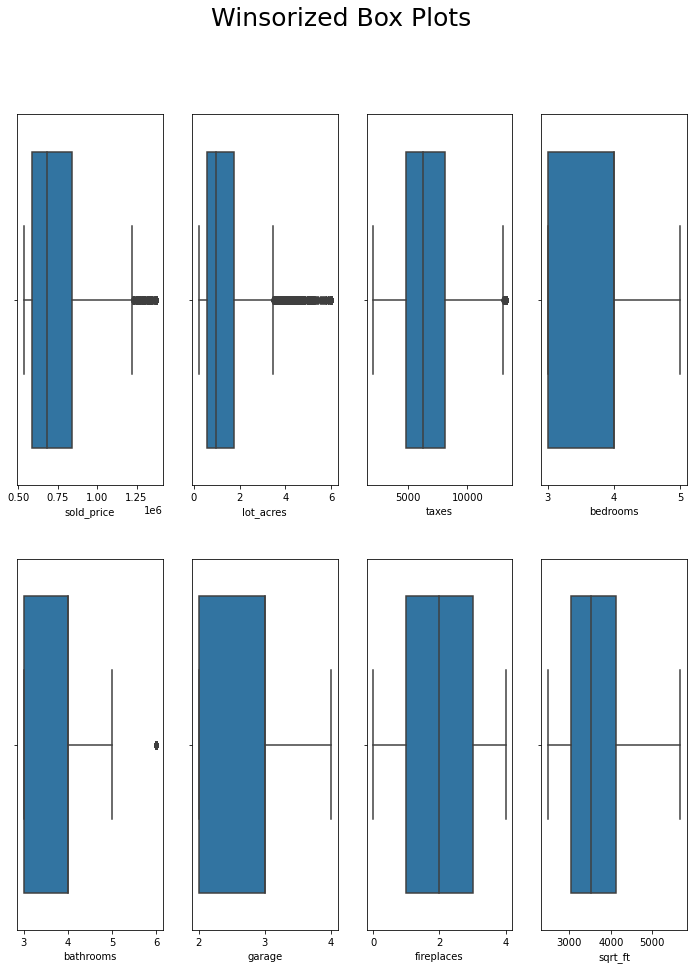

In [34]:
# Boxplots of numerical values after winsorizing
n_rows = 2
n_cols = len(numVarsToPlot) // 2
count = 0

fig, ax = plt.subplots(n_rows, n_cols, figsize=(12,15))

for idx, var in enumerate(numVarsToPlot):
    plt.subplot(n_rows, n_cols, count+1)
    sns.boxplot(data3[var], orient="vertical")
    count += 1
fig.suptitle("Winsorized Box Plots", fontsize=25)
plt.show()


In [35]:
data3.to_csv("Final_cleaned_data.csv")

Text(0.5, 1.0, 'Comparing selling prices of housing units by number of bedrooms')

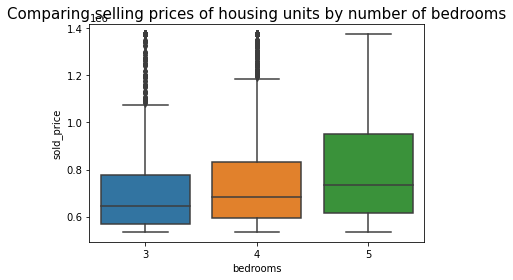

In [36]:
sns.boxplot(x="bedrooms", y="sold_price", data=data3).set_title("Comparing selling prices of housing units by number of bedrooms", fontsize=15)

Text(0.5, 1.0, 'Comparing selling prices of housing units by number of bathrooms')

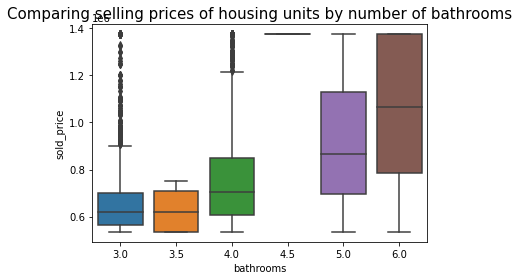

In [37]:
sns.boxplot(x="bathrooms", y="sold_price", data=data3).set_title("Comparing selling prices of housing units by number of bathrooms", fontsize=15)

Text(0.5, 1.0, 'Comparing selling prices of housing units by number of fireplaces')

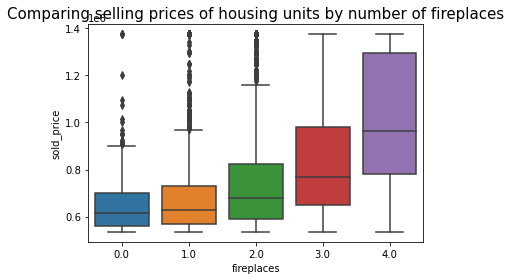

In [38]:
sns.boxplot(x="fireplaces", y="sold_price", data=data3).set_title("Comparing selling prices of housing units by number of fireplaces", fontsize=15)

Text(0.5, 1.0, 'Scatter Plot of housing price and its area')

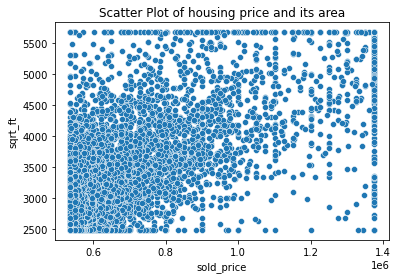

In [39]:
sns.scatterplot("sold_price", "sqrt_ft", data=data3).set_title("Scatter Plot of housing price and its area")

Text(0.5, 1.0, 'Scatter Plot of housing price and its lot_acres')

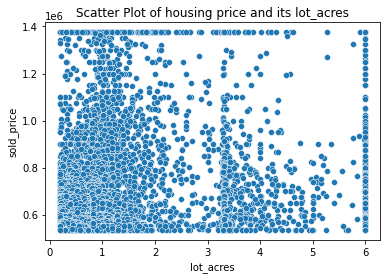

In [40]:
sns.scatterplot("lot_acres", "sold_price", data=data3).set_title("Scatter Plot of housing price and its lot_acres")

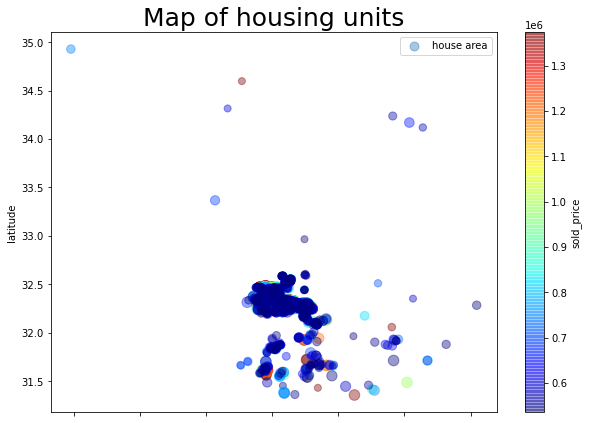

In [41]:
data3.plot(kind="scatter", x="longitude", y="latitude",
    s=data3['sqrt_ft']/50, label="house area",
    c="sold_price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.title("Map of housing units", fontsize=25)
plt.legend()
plt.show()